# Web scraping on Reddit

# 

In [2]:
#!pip install psaw

In [21]:
import copy
import numpy as np
import pandas as pd
import requests
import time
import io

from datetime import datetime 
from psaw import PushshiftAPI

# I - Importation des données

In [4]:
api = PushshiftAPI()

In [5]:
#search for posts of the year 2021
start_epoch_2021 = int(datetime(2021, 1, 1).timestamp())
end_epoch_2021 = int(datetime(2021, 12, 31).timestamp())

api_request_generator_21 = api.search_submissions(
    after=start_epoch_2021,
    before=end_epoch_2021,
    subreddit='antiwork',
    limit=3000,
    score=">40"
)

df21 = pd.DataFrame([submission.d_ for submission in api_request_generator_21])

df21["created_utc"] = df21["created_utc"].apply(datetime.fromtimestamp)

time.sleep(1)


#search for posts of the year 2020

start_epoch_2020 = int(datetime(2020, 1, 1).timestamp())
end_epoch_2020 = int(datetime(2020, 12, 31).timestamp())

api_request_generator_20 = api.search_submissions(
    after=start_epoch_2020,
    before=end_epoch_2020,
    subreddit='antiwork',
    limit=3000,
    score=">40"
)

df20 = pd.DataFrame([submission.d_ for submission in api_request_generator_20])

df20["created_utc"] = df20["created_utc"].apply(datetime.fromtimestamp)

time.sleep(1)


#search for posts of the year 2019

start_epoch_2019 = int(datetime(2019, 1, 1).timestamp())
end_epoch_2019 = int(datetime(2019, 12, 31).timestamp())

api_request_generator_19 = api.search_submissions(
    after=start_epoch_2019,
    before=end_epoch_2019,
    subreddit='antiwork',
    limit=3000,
    score=">40"
)

df19 = pd.DataFrame([submission.d_ for submission in api_request_generator_19])

df19["created_utc"] = df19["created_utc"].apply(datetime.fromtimestamp)

time.sleep(1)


#search for posts of the year 2018

start_epoch_2018 = int(datetime(2018, 1, 1).timestamp())
end_epoch_2018 = int(datetime(2018, 12, 31).timestamp())

api_request_generator_18 = api.search_submissions(
    after=start_epoch_2018,
    before=end_epoch_2018,
    subreddit='antiwork',
    limit=3000,
    score=">40"
)

df18 = pd.DataFrame([submission.d_ for submission in api_request_generator_18])

df18["created_utc"] = df18["created_utc"].apply(datetime.fromtimestamp)

C:\Users\nicol\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


In [7]:
df21 = df21[['score','created_utc']]
df20 = df20[['score','created_utc']]
df19 = df19[['score','created_utc']]
df18 = df18[['score','created_utc']]

In [6]:
print(len(df21.index),len(df20.index),len(df19.index),len(df18.index))

1579 396 1938 57


In [8]:
df = pd.concat([df21,df20,df19,df18])
df = df.rename(columns={'created_utc':'date'})
df.head()

,score,date
0,57,2021-12-09 07:08:38
1,45,2021-12-09 06:26:55
2,81,2021-12-09 06:22:33
3,68,2021-12-09 06:21:43
4,43,2021-12-09 06:20:32


# II - Visualisation des données 

<AxesSubplot:title={'center':'Score des posts reddit sur le thème antiwork entre 2018 et 2021'}, xlabel='date', ylabel='score'>

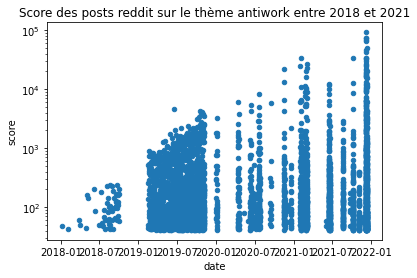

In [40]:
df.plot(kind='scatter',x='date',y='score',logy=True,title='Score des posts reddit sur le thème antiwork entre 2018 et 2021')

Ensuite, on va rendre les variables moins abrutes en créant une variable continue qui à une date donnée associe le score moyen des posts reddit sur une période fixe (un jour puis un mois).

 On envisage d'analyser la corrélation entre la situation d'économie et la tendance/ la popularité de différents subreddit sur le site internet "Reddit", par exemple la difficulté économique aux Etats Unis incite la popularité de subreddit "Antiwork". Au niveau de source de données, on envisage d'utiliser Reddit API pour acquérir les données sur Reddit, et le site internet de World Bank pour les données économiques.

# III - Importation des données de PIB des Etats-Unis de 2018 à 2021

On utilisera les données de la banque de la réserve fédérale américaine.

In [10]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor\
=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=y\
es&show_axis_titles=yes&show_tooltip=yes&id=GDP&scale=left&cosd=2017-10-01&coed=2021-07-01&line_color=%234572a7&link_values\
=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-\
02-01&line_index=1&transformation=lin&vintage_date=2022-01-02&revision_date=2022-01-02&nd=1947-01-01'

GDP = requests.get(url,allow_redirects=True).content.decode("utf-8")

In [11]:
gdp = [float(GDP[20+i*21:29+i*21]) for i in range(16)] + [round(1.022*float(GDP[20+15*21:29+15*21]),3)] 

Pib en milliard de dollars
(Augmentation de 2.2 % du pib au 4ème trimestre 2021)

In [12]:
date_df = pd.date_range('2017-10-01', periods=17, freq='3M')
gdp_df = pd.DataFrame({ 'date': date_df,'GDP': gdp})

def _31_to_01(t):
    T = str(t)
    return T[:8]+"01"

gdp_df['date'] = gdp_df['date'].apply(_31_to_01) 

gdp_df = gdp_df.set_index('date')

In [13]:
gdp_growth = gdp_df.pct_change()[1:]
gdp_growth = gdp_growth.reset_index()

In [14]:
gdp_growth.head()

,date,GDP
0,2018-01-01,0.013114
1,2018-04-01,0.017314
2,2018-07-01,0.008130
3,2018-10-01,0.007465
4,2019-01-01,0.009045


<AxesSubplot:title={'center':'Taux de croissance du PIB aux Etats-Unis entre 2018 et 2021 en milliards de dollars'}, xlabel='date'>

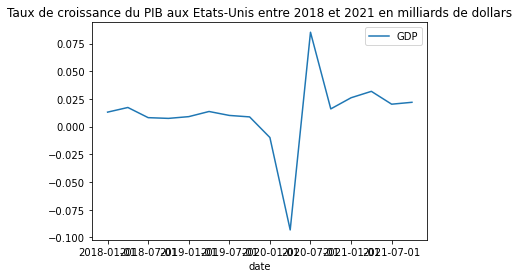

In [15]:
gdp_growth.plot(kind='line',x='date',y='GDP',title='Taux de croissance du PIB aux Etats-Unis entre 2018 et 2021 en milliards \
de dollars')

# - Importation des données de taux d'inflation des Etats-Unis de 2018 à 2021

In [35]:
url2 = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=T10YIE&scale=left&cosd=2018-01-01&coed=2021-12-31&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Daily&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-01-04&revision_date=2022-01-04&nd=2003-01-02"
url3 = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CPILFESL&scale=left&cosd=2018-01-01&coed=2021-11-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-01-04&revision_date=2022-01-04&nd=1957-01-01"
inflation = requests.get(url2,allow_redirects=True).content.decode("utf-8")
CPI = requests.get(url3,allow_redirects=True).content.decode("utf-8")


In [22]:
data = io.StringIO(inflation)
df_inflation = pd.read_csv(data, sep=",")

In [23]:
df_inflation.head()

,DATE,T10YIE
0,2018-01-02,2.0
1,2018-01-03,1.98
2,2018-01-04,2.01
3,2018-01-05,2.01
4,2018-01-08,2.02


In [32]:
df_inflation['T10YIE'] = pd.to_numeric(df_inflation['T10YIE'],errors='coerce')

<AxesSubplot:title={'center':"Taux d'inflation aux Etats-Unis entre 2018 et 2021"}, xlabel='DATE'>

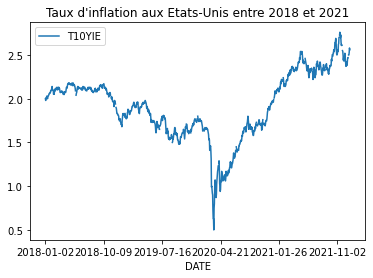

In [34]:
df_inflation.plot(kind='line',x='DATE',y="T10YIE",title="Taux d'inflation aux Etats-Unis entre 2018 et 2021")

In [36]:
data = io.StringIO(CPI)
df_CPI = pd.read_csv(data, sep=",")

In [41]:
df_CPI.head()

,DATE,CPILFESL,T10YIE
0,2018-01-01,255.007,255.007
1,2018-02-01,255.472,255.472
2,2018-03-01,256.117,256.117
3,2018-04-01,256.656,256.656
4,2018-05-01,257.157,257.157


In [39]:
df_CPI['T10YIE'] = pd.to_numeric(df_CPI['CPILFESL'],errors='coerce')

<AxesSubplot:title={'center':'CPI aux Etats-Unis entre 2018 et 2021'}, xlabel='DATE'>

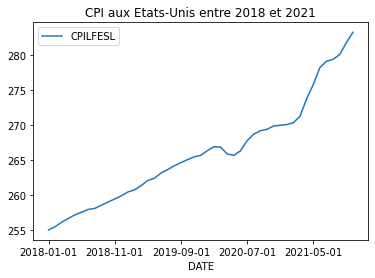

In [40]:
df_CPI.plot(kind='line',x='DATE',y="CPILFESL",title="CPI aux Etats-Unis entre 2018 et 2021")

In [ ]:
def d

# IV - Moyennes trimestrielles de la tendance du thème sur Reddit de 2018 à 2021

In [16]:
df_quarter = copy.deepcopy(df)

def to_quarter(t):
    T = str(t)
    if int(T[5:7]) < 4:
        return pd.Timestamp(T[:5]+"01")
    elif int(T[5:7]) < 7:
        return pd.Timestamp(T[:5]+"04")
    elif int(T[5:7]) < 10:
        return pd.Timestamp(T[:5]+"07")
    else:
        return pd.Timestamp(T[:5]+"10")
    
df_quarter['date'] = df_quarter['date'].apply(to_quarter) 

df_quarter = df_quarter.groupby(by='date').sum().groupby(level=[0]).cumsum()

df_quarter = df_quarter.reset_index()

<AxesSubplot:title={'center':'Tendance trimestrielle de la tendance du post entre 2018 et 2021'}, xlabel='date'>

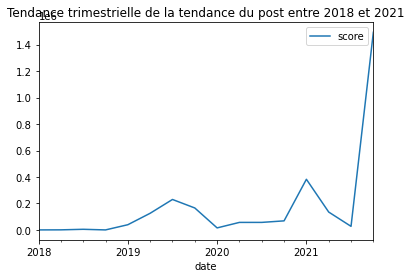

In [17]:
df_quarter.plot(kind='line',x='date',y='score',title='Tendance trimestrielle de la tendance du post entre 2018 et 2021')

# V - Taux de croissance du PIB et le score trimestriel

In [18]:
gdp_np = gdp_growth['GDP'].to_numpy()
score_np = df_quarter['score'].to_numpy()

gdp_np = (gdp_np - np.mean(gdp_np))/np.std(gdp_np)
score_np = (score_np - np.mean(score_np))/np.std(score_np)

gdp_np = gdp_np.reshape((-1, 1))

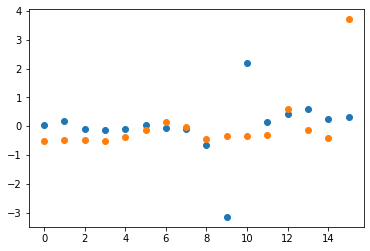

In [21]:
import matplotlib.pyplot as plt

plt.scatter(range(16),gdp_np)
plt.scatter(range(16),score_np)
plt.show()

 # Analyse des sentiments

In [23]:

df['date'] = pd.to_datetime(df['created_utc'], utc=True, unit='s')
df[['author', 'date', 'title', 'selftext', 'url', 'subreddit', 'score', 'num_comments', 'num_crossposts']].head(10)

KeyError: 'created_utc'

In [37]:
start_epoch=int(datetime(2021, 10, 1).timestamp())
end_epoch=int(datetime(2021, 12, 1).timestamp())

api_request_generator = api.search_comments(
                            after=start_epoch,
                            before = end_epoch,
                            limit=10000,
                            score = ">1000")

df2 = pd.DataFrame([submission.d_ for submission in api_request_generator])

df2["created_utc"] = df2["created_utc"].apply(datetime.fromtimestamp)

In [38]:
df2['body']

0          lol she's doing press, she loves the attention
1                                 I'm really sorry man :(
2                       I'd be head first out that window
3            Nah, that's dollar store daenerys targaryen.
4       Nope. Hence why there are only a few places th...
                              ...                        
9993                      "You may now bench the groom. "
9994                 We’re all disappointed in you, Doug.
9995    Surprise. Not sure what OP thinks milk is made...
9996    Aw, don't be mean to the little squid thingey....
9997    A heartfelt apology would go so much further w...
Name: body, Length: 9998, dtype: object

In [42]:
!pip install -q -U tensorflow-text

In [44]:
pip install -q tf-models-official

Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\nicol\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\nicol\\AppData\\Local\\Temp\\pip-install-6oo1vd2s\\pycocotools_7e4adfbed6734090a4fd4630134a0dcb\\setup.py'"'"'; __file__='"'"'C:\\Users\\nicol\\AppData\\Local\\Temp\\pip-install-6oo1vd2s\\pycocotools_7e4adfbed6734090a4fd4630134a0dcb\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\nicol\AppData\Local\Temp\pip-wheel-b3ecxr5i'
       cwd: C:\Users\nicol\AppData\Local\Temp\pip-install-6oo1vd2s\pycocotools_7e4adfbed6734090a4fd4630134a0dcb\
  Complete output (14 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\pycocotools
  copying pycocotools\coco.py -> build\lib.win-amd64

In [45]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

ModuleNotFoundError: No module named 'official'